<center><h1><font size=6> Initial Data Processing and Feature Engineering </h1></center>

### Load libraries and setup notebook configuration

In [1]:
# import packages
import pandas as pd 
import numpy as np
import os
from pathlib import Path
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



# set pandas configurations
pd.set_option("display.precision", 2) # display to 1 decimpal place
pd.set_option("display.max.columns", None) # display all columns so we can view the whole dataset
pd.set_option('display.float_format', '{:.2f}'.format) # Disable scientific notation for pandas
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning) # Disable setting with copy warnings


# set directories
os.chdir('..') # change current working directory to the parent directory to help access files/directories at a higher level
DATAPATH = Path(r'data') # set data path


# import from source directory
from src import constants

### Load processed training data

In [2]:
X_train = pd.read_csv(f"{DATAPATH}/processed/X_train_full_processed.csv").set_index('unique_match_id', inplace=False)
y_train = pd.read_csv(f"{DATAPATH}/processed/y_train_full_processed.csv").set_index('unique_match_id', inplace=False)

### Define functions

In [3]:
def calculate_evaluation_metrics(y_true, y_pred):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Precision
    precision = precision_score(y_true, y_pred, average='weighted')

    # Recall
    recall = recall_score(y_true, y_pred, average='weighted')

    # F1 Score
    f1 = f1_score(y_true, y_pred, average='weighted')

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    return accuracy, precision, recall, f1

In [22]:
def plot_confusion_matrix(y_true, y_pred, classes):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Normalize the confusion matrix
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Normalize the confusion matrix
    cm = cm.astype('float') / cm.sum(axis=0)
    
    # Create a figure and axis
    plt.figure(figsize=(8, 6))
    ax = plt.subplot()
    
    # Create heatmap
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)
    
    # Set labels, title, and ticks
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(classes, rotation=45, ha='right')
    ax.yaxis.set_ticklabels(classes, rotation=0)
    
    # Ensure the heatmap is shown correctly
    plt.tight_layout()
    plt.show()

### Baseline non-ML solution

Before moving to ML prediction, lets define a really simple baseline solution of home team always wins and away team always loses and evaluate its performance. This gives a symetrical confusion matrix - this is because games appear twice in the data (once when the team is the team, and once where they are the opponent).

In [23]:
# extract predictions of y as home = win, away = lose
y_pred_train = X_train['home'].copy()
y_pred_train[y_pred_train == 1] = 2

In [24]:
# extract evaluation metrics
accuracy, precision, recall, f1 = calculate_evaluation_metrics(y_true=y_train, y_pred=y_pred_train)

Accuracy: 0.4555623916326417
Precision: 0.33822583048305027
Recall: 0.4555623916326417
F1 Score: 0.38822127253762334


C:\Users\lucel\Downloads\Python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\lucel\AppData\Local\Temp\ipykernel_4224\1423141336.py:9: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=0)


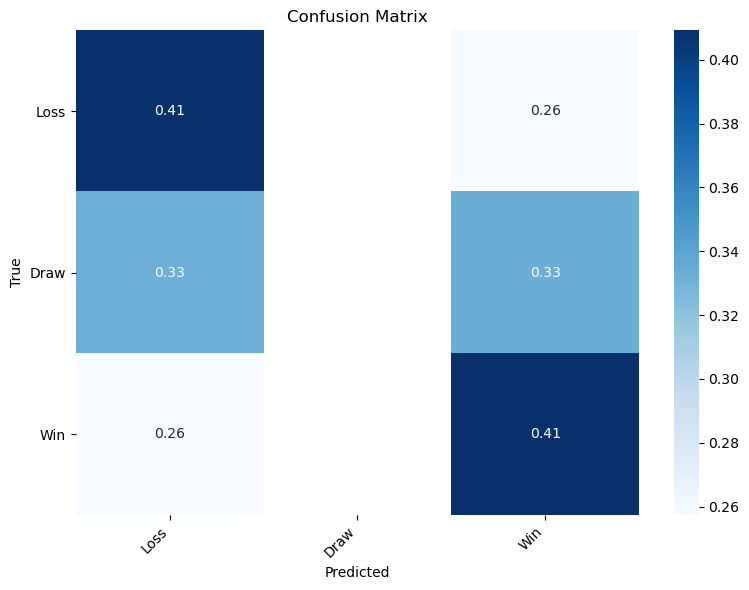

In [25]:
# plot confusion matrix
classes = ['Loss', 'Draw', 'Win']
plot_confusion_matrix(y_true=y_train, y_pred=y_pred_train, classes=classes)

In [26]:
# make predictions only on data that only keeps the home team to avoid duplication
X_train_home = X_train[X_train['home'] == 1]
y_train_home = y_train[y_train.index.isin(X_train_home.index)]

In [27]:
# extract predictions of y as home = win, away = lose
y_pred_train_home = X_train_home['home'].copy()
y_pred_train_home[y_pred_train_home == 1] = 2

In [28]:
# extract evaluation metrics
accuracy, precision, recall, f1 = calculate_evaluation_metrics(y_true=y_train_home, y_pred=y_pred_train_home)

Accuracy: 0.455697622252131
Precision: 0.2076603229262459
Recall: 0.455697622252131
F1 Score: 0.2853069480253345


C:\Users\lucel\Downloads\Python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\lucel\AppData\Local\Temp\ipykernel_4224\1423141336.py:9: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=0)


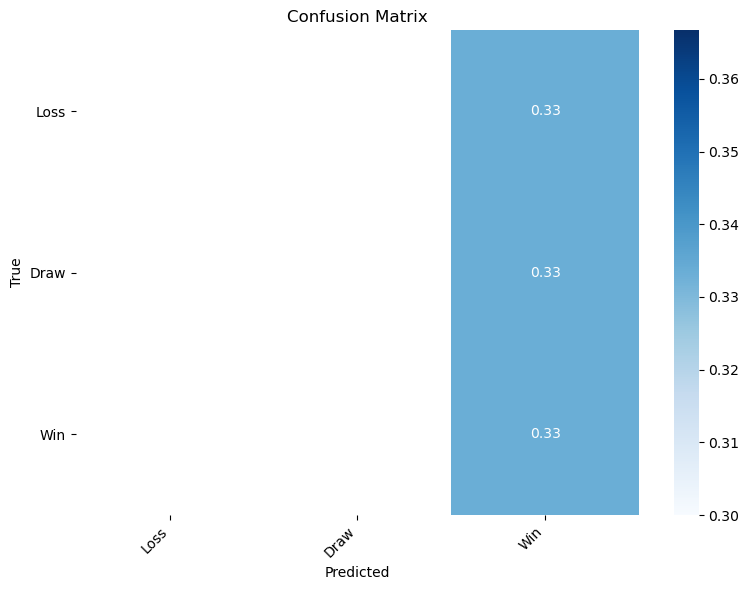

In [29]:
plot_confusion_matrix(y_true=y_train_home, y_pred=y_pred_train_home, classes=classes)